In [1]:
import random
import pprint
import types
import numpy as np
import pandas as pd
import lsh_func
from IPython.core.debugger import Tracer
from collections import defaultdict
from operator import itemgetter
from itertools import product, combinations
# from pylab import *
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import l2_hash_family
import cosine_hash_family
import lsh_tester
import lsh_index

from lsh_index import LSHIndex
from l2_hash_family import L2HashFamily
from cosine_hash_family import CosineHashFamily
from lsh_tester import LSHTester

In [2]:
# create random 3D unit vector

d = 3
num_points = 10000
points = []
for _ in xrange(num_points):
    points.append(list(lsh_func.random_three_vector()))
# pprint.pprint(points)


In [3]:
p_array = []
for p in points:
    p_array.append(p)
    
p_df = pd.DataFrame(p_array)
q_index = 846
l1_range = 0.2
neighbor_array = []
neighbor_df = p_df[(p_df[0] > p_df[0][q_index] - l1_range) 
                   & (p_df[0] < p_df[0][q_index] + l1_range)
                   & (p_df[1] > p_df[1][q_index] - l1_range) 
                   & (p_df[1] < p_df[1][q_index] + l1_range)
                   & (p_df[2] > p_df[2][q_index] - l1_range) 
                   & (p_df[2] < p_df[2][q_index] + l1_range)
                  ]
neighbor_array = neighbor_df.values.tolist()
print len(neighbor_array)

316


In [4]:
# np points array
p_array = np.asarray(points)
# np neighbor array
n_array = np.asarray(neighbor_array)

p_lat_array = np.array(np.arcsin(p_array[:,2])) * 180 / np.pi
p_long_array = np.array(np.arctan2(p_array[:,1], p_array[:,0])) * 180 / np.pi

n_lat_array = np.array(np.arcsin(n_array[:,2])) * 180 / np.pi
n_long_array = np.array(np.arctan2(n_array[:,1], n_array[:,0])) * 180 / np.pi

# pprint.pprint(p_long_array)
# pprint.pprint(n_array)
# pprint.pprint(n_array[:,2])

<IPython.core.display.Javascript object>


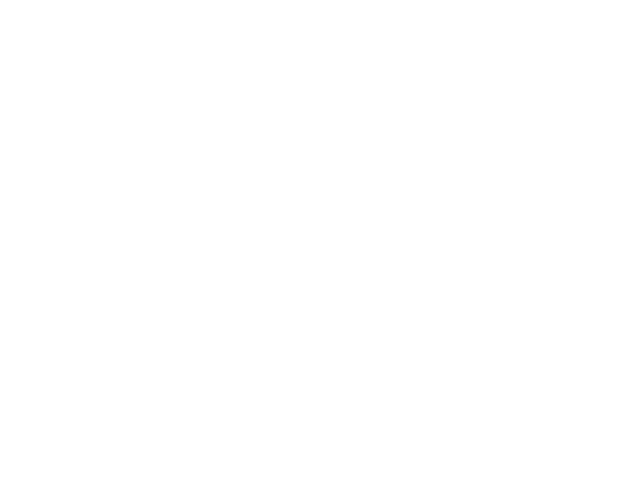

array([[ 0.6204453 ,  0.13277922,  0.26489516],
       [ 0.6204453 ,  0.13277922,  0.66489516],
       [ 0.6204453 ,  0.53277922,  0.26489516],
       [ 0.6204453 ,  0.53277922,  0.66489516],
       [ 1.0204453 ,  0.13277922,  0.26489516],
       [ 1.0204453 ,  0.13277922,  0.66489516],
       [ 1.0204453 ,  0.53277922,  0.26489516],
       [ 1.0204453 ,  0.53277922,  0.66489516]])
[0.820445296047701, 0.33277921762134527, 0.46489515862452857]


(-1, 1)

In [5]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

# draw points
ax.plot(p_array[:,0],p_array[:,1],p_array[:,2], '.', color='pink', zorder=1)

# draw neighbor points
ax.plot(n_array[:,0],n_array[:,1],n_array[:,2], '.', color='green', zorder=2)

# draw query point
ax.scatter(p_array[q_index,0],p_array[q_index,1],p_array[q_index,2], color="black", s=120, zorder=10)

#draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

#draw cube
r = [-l1_range, l1_range]
vertex = np.array(list(product(r,r,r)))+[p_array[q_index,0],p_array[q_index,1],p_array[q_index,2]]
for s, e in combinations(vertex, 2):
    if np.sum(np.round(np.abs(s-e),decimals=2)) == np.round(r[1]-r[0], decimals=2):
        ax.plot3D(*zip(s,e), color="b")

pprint.pprint(vertex)
pprint.pprint([p_array[q_index,0],p_array[q_index,1],p_array[q_index,2]])

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

<IPython.core.display.Javascript object>


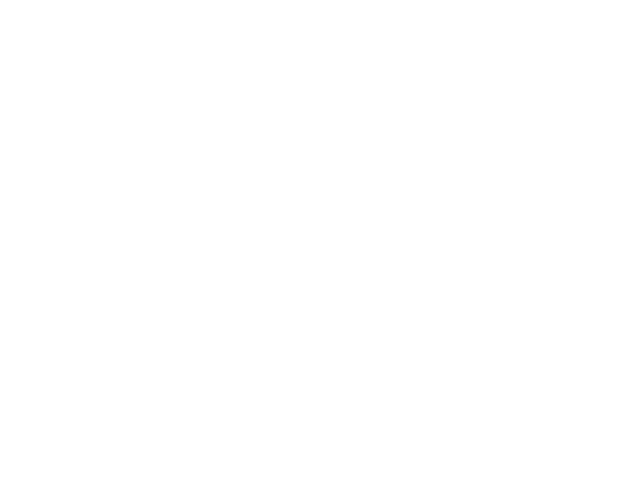

(-90, 90)

In [6]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca()

# draw points
ax.plot(p_long_array, p_lat_array, '.', color='pink', zorder=1)

# draw neighbor points
ax.plot(n_long_array, n_lat_array, '.', color='green', zorder=2)

# draw query point
ax.scatter(p_long_array[q_index], p_lat_array[q_index], color="black", s=20, zorder=3)

ax.set_xlim([-180,180])
ax.set_ylim([-90,90])

<IPython.core.display.Javascript object>


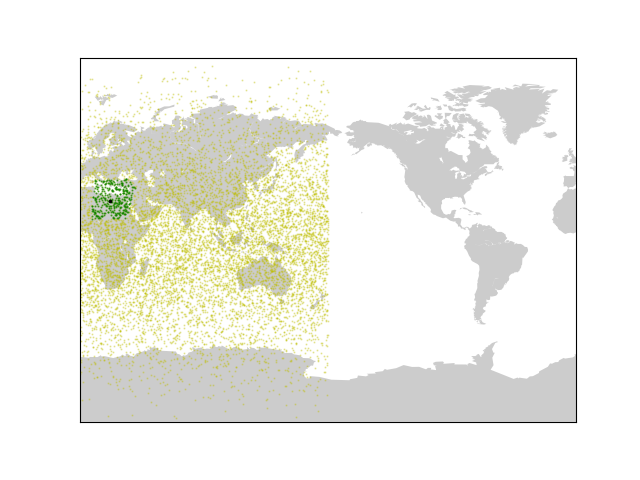

In [7]:
%matplotlib notebook
m = Basemap(projection='mill',lon_0=180)
m.fillcontinents()

p_x, p_y = m(p_long_array,p_lat_array)
m.scatter(p_x,p_y,s=3,marker='.',color='y', alpha = 0.3,zorder = 2)

n_x, n_y = m(n_long_array,n_lat_array)
m.scatter(n_x,n_y,s=3,marker='.',color='g', alpha = 0.5,zorder = 3)

p_x, p_y = m(p_long_array[q_index],p_lat_array[q_index])
m.scatter(p_x,p_y,s=20,marker='.',color='k', zorder = 4)

